<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/main/SSJ_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> We are team SSJ and our Data Distribution is Iquitos 2002 - 2005
.

---

We are going to use the data of the competition of prediction of the data of the Dengue. More information at this [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

The purpose of this notebook is to become comfortable with basic operations and pre-process the data.

# Setting Preliminaries
Prior to starting any analysis, it is necessary to ensure that the basic and general purpose libraries (numpy, pandas, etc.) are correctly imported.

In [193]:
# General
from google.colab import files
import pandas as pd
import io
import numpy as np

#Plot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Dimensionality reduction
from sklearn.decomposition import PCA

# Clustering Execution
from sklearn import metrics
from random import randint
from sklearn.cluster import KMeans, DBSCAN

# Hierarchical Clustering
from sklearn import neighbors
from scipy.cluster import hierarchy

# DBSCAN
from tabulate import tabulate

# Loading Data

We start by loading our data file, in our case it's in CSV format.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.

Once we have loaded the CSV file, we will use the Python Pandas library, which will help us to load the data in a structure that allows us to handle our data easily.

In [194]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

iq = upload_files(['city', 'year', 'weekofyear'])
iq

Saving dengue_features_train (2).csv to dengue_features_train (2) (1).csv
User uploaded file "dengue_features_train (2).csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8
...                              ...  ...                ...
iq   2010 21              2010-05-28  ...               27.0
          22              2010-06-04  ...               36.6
          23              2010-06-11  ...                7.4
          24              2010-06-18  ...               16.0
          25              2010-06-25  ...               20.4

[1456 rows x 21 columns]

# Preprocessing 


In this step we will carry out actions that will allow us to obtain the data with which we will work and improve its appearance so that it is more comfortable to work with them.

For example, it is important to remove redundancy. For example, week_start_date could be inferred from weekofyear and year.


In [195]:
iq.drop("week_start_date", axis = 1, inplace = True)
iq.head()

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city year weekofyear                      ...                                       
sj   1990 18          0.122600  0.103725  ...                20.0               16.0
          19          0.169900  0.142175  ...                22.2                8.6
          20          0.032250  0.172967  ...                22.8               41.4
          21          0.128633  0.245067  ...                23.3                4.0
          22          0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

At this point, we must know that we are working on the complete dataset, however, we will only work with the data of the city of Iquitos from 2002 to 2005, both included.

In [196]:
# Subset extracted by rules.
iq = iq.loc['iq']
iq = iq.loc[2002:2005]

iq

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
year weekofyear                      ...                                       
2002 1           0.405729  0.348400  ...                23.0               45.3
     2           0.327583  0.375917  ...                21.0                7.1
     3           0.241086  0.145650  ...                22.0                5.0
     4           0.104129  0.148329  ...                21.0               18.0
     5                NaN       NaN  ...                20.8              120.2
...                   ...       ...  ...                 ...                ...
2005 47          0.282571  0.220600  ...                21.8                5.1
     48          0.317814  0.302700  ...                21.7               77.9
     49          0.358586  0.219486  ...                21.5               54.1
     50          0.198443  0.194100  ...                22.3                6.0
     51          0.180575  0.141333  ...                22.9               81.1

[208 rows x 20 columns]

The next step is to check if there is any missing value in our data. The existence of lost values will make future work difficult.

In [197]:
pd.isnull(iq).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

We have verified that there are missing values in our dataset, therefore, we must complete those missing data. But the big question is which method to use to complete them.

We will use the dataframe.mean() method, thanks to it we will fill in these empty values with the mean of the rest of the values of that column.

In [198]:
iq.fillna(iq.mean(), inplace=True)
pd.isnull(iq).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

# Dimensionality Reduction


##Correlation


We are going to observe the correlation between the variables in our dataset.

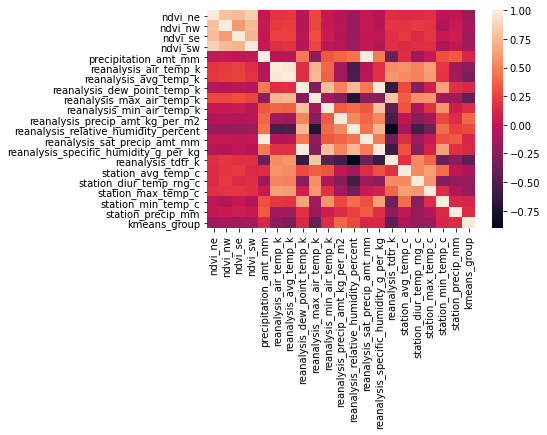

In [225]:
mtx_corr = iq.corr()
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)


We will try to reduce the number of variables as much as possible, eliminating those that have a similar meaning and choosing only those that are less correlated with each other and provide us with the maximum possible information in our study.

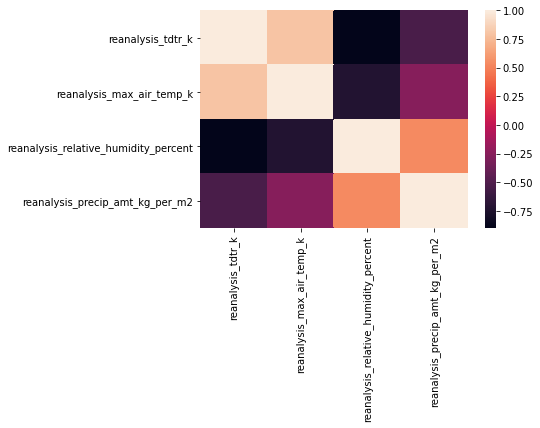

In [200]:
#selected_features = ['reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'reanalysis_relative_humidity_percent', 'reanalysis_max_air_temp_k']
selected_features = ['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_precip_amt_kg_per_m2']
mtx_corr = iq[selected_features].corr()
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

## Principal Component Analysis
Then, we have to obtain the results of the Principal Component Analysis. The first step is to normalize the data. For this we can use MinMaxScaler or StandardScaler.


 We have chosen StandarScaler because with this function we can standardize the data by eliminating the mean and scaling to the unit variance.

In [201]:
scaler = StandardScaler()  #@param ["MinMaxScaler()", "StandardScaler()"] {type:"raw"}
datanorm = scaler.fit_transform(iq[selected_features])

Now we are going to obtain the main components, for this, we execute PCA. We build the parser without its parameters (number of components, we'll give it a value later) and then we get the pca projection using the fit_transform method.


In [202]:
pca = PCA ()
X_pca = pca.fit_transform(datanorm)
X_pca.shape

(208, 4)

Now the variance percentage of each of the selected components is shown.

The sum of the variances of the set of principal components must add up to 100% of the total variance.

The relationship between the variance and the total variance of each principal component is called the "proportion of explained variance."

In [203]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.94073763 0.76985543 0.22147203 0.08725858]
[0.73164987 0.19153855 0.05510181 0.02170977]
[0.73164987 0.92318842 0.97829023 1.        ]


Then, we show the percentage of variance explained by each of the components.
 

In [204]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

We must try with the minimum possible number of components to represent the maximum percentage of data. (With a 95% percentage it would be fine).

In [205]:
#@title Number of components {run: "auto"}
n_components = 2 #@param { type: "slider", min: 1, max: 17, step: 1}

In [206]:
X_pca = PCA (n_components = n_components).fit_transform(datanorm)

Now, PCA finds new coordinates for each point. The axes that are represented are used to give an axis the greatest variation. We can also extract the lines obtained by the PCA that characterize the data. Therefore, we can represent the eigenvalues and eigenvectors

In [207]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], title="Representation of data with PCA")

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig2 = px.scatter(x=X_pca[:,0], y= X_pca[:,1], title="Eigenvalues & eigenvectors")

for i, feature in enumerate(iq[selected_features]):
    fig2.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig2.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature
    )
fig2.show()

# Outlier Identification

The key idea of density-based clustering algorithms is that they assume that groups are defined in areas of high data density. Low-density areas separate groups. DBSCAN is the first algorithm that was defined based on density describing the concepts of central point, edge and noise. The central points have a neighborhood area for a given radius that has at least a minimum number of points, i.e. their neighborhood area exceeds a certain threshold.



## DBSCAN


We draw in a chart the shortest distance to the neighbor to obtain the epsilon to use in DBSCAN. As MintPts we put a low number, considering that having 3 similar states is already synonymous with a dense area.


In [219]:
dist = neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

fig = px.imshow(matsim)
fig.show()

Next, we need setting parameters. Now we are going to calculate the distance of each point to its neighbors. We set the minimum number of points to 6 since we understand that this results in a dense area.


In [222]:

minPts = 6 #@param {type:"slider", min:0, max:200, step:1} 

A = neighbors.kneighbors_graph(datanorm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(datanorm):
    for j in range(len(datanorm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
   
seq.sort()

fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

Although it could be tested with other options we are going to choose to try different clusters from 0.50 to 2 with intervals of 0.1. However, the layout of the data will make DBSCAN only isolate a dense area of those elements that it considers outliers.

In [221]:
results = []
for eps in np.arange(0.50, 2, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  results.append([eps, n_clusters_, n_outliers])

print(tabulate(results, headers = ("eps", "clusters", "outliers")))


  eps    clusters    outliers
-----  ----------  ----------
  0.5           4          50
  0.6           3          31
  0.7           3          20
  0.8           3          11
  0.9           2           8
  1             2           6
  1.1           1           3
  1.2           1           2
  1.3           1           2
  1.4           1           2
  1.5           1           2
  1.6           1           2
  1.7           1           2
  1.8           1           2
  1.9           1           2


As we can see DBSCAN groups the elements in a group and the rest are outliers. The number of outliers is significant to take into account, so we are going to keep the settings that offer a balanced number between outliers and groups.DBSCAN has grouped the items into two groups and the rest are outliers. The outliers are represented by -1, and the elements may be 0, 1, 2... This will depend on the number of clusters.

Visualization

In [223]:
db = DBSCAN(eps=1, min_samples=minPts).fit(datanorm)
labels = db.labels_

fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = labels)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

Outlier Identification

In [226]:
iq['group-db'] = labels
iq[iq['group-db'] == -1]

ndvi_ne   ndvi_nw  ...  kmeans_group  group-db
year weekofyear                      ...                        
2002 10          0.318367  0.255600  ...             0        -1
     38          0.327414  0.347257  ...             1        -1
     39          0.237983  0.308429  ...             1        -1
     40          0.272114  0.179367  ...             1        -1
2003 12          0.214214  0.225157  ...             2        -1
     40          0.253500  0.237114  ...             0        -1
2004 24          0.237843  0.235083  ...             2        -1
2005 39          0.405417  0.428771  ...             1        -1
     40          0.332157  0.346367  ...             1        -1
     41          0.373429  0.277483  ...             1        -1
     45          0.393800  0.298629  ...             0        -1

[11 rows x 22 columns]

# Clustering by K-means

The k-means algorithm is based on the idea that a central point can represent a group, this point is called the centroid.

The k-means algorithm looks for centroids that can represent a group of points, a centroid is a central point that represents the mean or median of a group of points.

We have chosen to group the project data by PCA.

In [208]:
# Plot
def plot_pca(X_pca, labels, title):
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)
    numbers = np.arange(len(X_pca))
    fig, ax = plt.subplots()
    for i in range(len(X_pca)):
        plt.text(X_pca[i][0], X_pca[i][1], numbers[i], color=colors[labels[i]]) 
    plt.xlim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
    plt.ylim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
    plt.title(title)
    ax.grid(True)
    fig.tight_layout()
    plt.show()

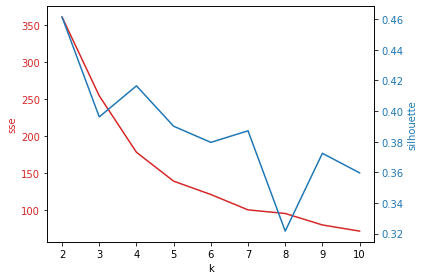

In [209]:
# Setting parameters 

# kmeans parameters

## initialization method 
init = "random" #@param ["random", "k-means++"]

## to run 10 times with different random centroids to choose the final model as the one with the lowest SSE
iterations = 10 #@param {type:"slider", min:0, max:100, step:1} 

## maximum number of iterations for each single run
max_iter = 300 #@param {type:"slider", min:10, max:500, step:1} 

## controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence
tol = 0.0001 #@param {type:"slider", min:0.0001, max:0.001, step:0.0001}

random_state = 0 # random


distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol, random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [210]:
# Clustering execution
## from previous pictures but it is not easy to choose
k = 3 #@param {type:"slider", min:0, max:100, step:1}  

In [211]:
# Random inicialization
print ("Number of clusters", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)


Number of clusters 3


And we're going to visualize the results.

First, the labels (assigned group) assigned to each point

In [212]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.396
Distortion: 254.40


In [213]:
km.labels_

array([2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

And plot the results using the PCA data

In [214]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

After obtaining the clusters, we move forward to interpret them.

In [215]:
iq['kmeans_group'] = km.labels_

In [216]:
iq[iq['kmeans_group']==2]

ndvi_ne   ndvi_nw  ...  station_precip_mm  kmeans_group
year weekofyear                      ...                                 
2002 1           0.405729  0.348400  ...               45.3             2
     5           0.266968  0.234784  ...              120.2             2
     6           0.184917  0.173329  ...               70.4             2
     7           0.291971  0.224143  ...               62.8             2
     9           0.116200  0.178743  ...               47.6             2
...                   ...       ...  ...                ...           ...
2005 17          0.214100  0.231533  ...               14.5             2
     18          0.146533  0.134583  ...               13.0             2
     20          0.270086  0.173757  ...               95.9             2
     23          0.139514  0.140100  ...               19.5             2
     51          0.180575  0.141333  ...               81.1             2

[62 rows x 21 columns]

In [217]:
res = iq[['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg','kmeans_group']].groupby('kmeans_group').describe()
res

reanalysis_tdtr_k             ... reanalysis_specific_humidity_g_per_kg           
                         count       mean  ...                                   75%        max
kmeans_group                               ...                                                 
0                         99.0   9.438464  ...                             18.218571  19.194286
1                         47.0  12.544377  ...                             16.580000  18.258571
2                         62.0   6.417051  ...                             18.405357  19.274286

[3 rows x 32 columns]

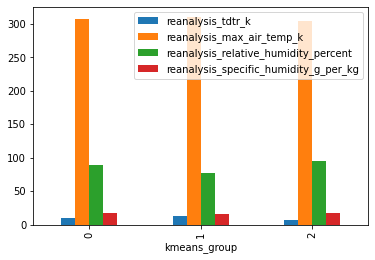

In [218]:
res = iq[['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg','kmeans_group']].groupby('kmeans_group').mean()
res.plot(kind='bar',legend=True)

# Hierarchical Clustering Algorithm

Hierarchical grouping algorithms generate a structure of groups organized in the form of a hierarchical tree, called dendrograms, which help to understand how the groups are related to each other. The top node of the tree encompasses all the elements and the leaf nodes will represent elements with maximum similarity.

## Similarity Matrix

The similarity matrix tells us the distance of each of the elements with the rest of the elements.

In [ ]:
dist = neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)
fig = px.imshow(matsim)
fig.show()
avSim = np.average(matsim)
print("%s\t%6.2f" % ('Distancia Media', avSim))

Distancia Media	  2.45


## Execution

The choice of the distance measure is very important for clustering to make sense. With different measures we will have different groupings.

In this case, having a large data concentration, we will use Complete - Link to separate the groups correctly.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



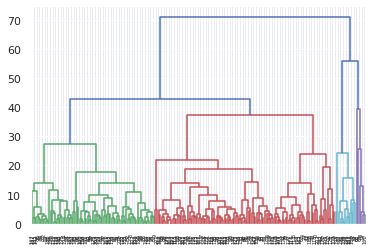

Number of clusters 4


array([2, 1, 1, 1, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [ ]:
method_name = "complete"      #@param [ "single", "complete", "average", "weighted","centroid", "median", "ward"]   
cut =   40                    #@param {type:"slider", min:1, max:100, step:1} 

# Building the Dendrogram

clusters = hierarchy.linkage(matsim, method = method_name) 
hierarchy.dendrogram(clusters, color_threshold=cut) # buscar corte
plt.show()

labels = hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels))))
labels

## Interpretation

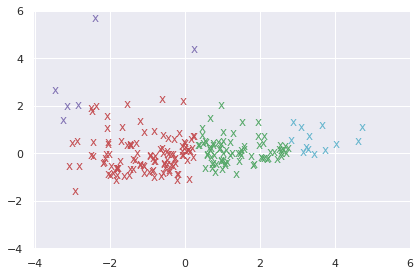

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()

for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colors[labels[i]])  

plt.xlim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
plt.ylim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)

ax.grid(True)
fig.tight_layout()
plt.show()

In [ ]:
# tratamos el cluster -1 como cluster de outliers
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(datanorm, labels))

Estimated number of clusters: 4
Silhouette Coefficient: 0.341


And we could start with the characterization of the groups, first visualizing them using the PCA projection (n_components = 2)

In [ ]:
#plotting orginal points with color related to label
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = labels)

for i in range(0,len(X_pca)):
    fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

And then obtaining basic statistics that allow us to interpret what each group means.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reanalysis_tdtr_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_max_air_temp_k
group_h,,,,
1,11.125417,27.430519,83.691373,308.545455
2,7.550963,66.123800,93.646507,305.630704
3,13.743956,12.015385,71.088242,311.123077
4,6.802381,242.221667,94.446190,306.200000


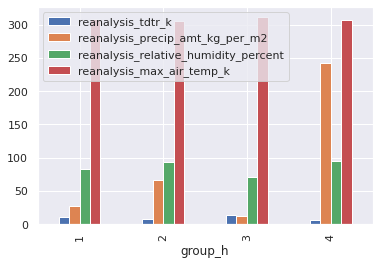

In [ ]:
iq_sf['group_h'] = labels

res = iq_sf[['reanalysis_tdtr_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_max_air_temp_k', 'group_h']].groupby(('group_h')).mean()
res.plot(kind='bar', legend=True)
res


Now we can access the elements of each group.




In [ ]:
iq_sf[iq_sf['group_h'] == 3]

reanalysis_tdtr_k  reanalysis_max_air_temp_k  ...  group  group_h
year weekofyear                                                ...                
2002 33                  14.385714                      308.9  ...      0        3
     37                  14.042857                      310.0  ...      0        3
     38                  16.028571                      311.2  ...     -1        3
     39                  13.171429                      312.6  ...     -1        3
     40                  13.757143                      313.2  ...     -1        3
2003 36                  12.771429                      309.5  ...      0        3
2004 5                   13.642857                      309.7  ...     -1        3
     6                   14.085714                      309.8  ...      0        3
2005 33                  14.200000                      310.5  ...     -1        3
     36                  13.714286                      309.3  ...      0        3
     39                  14.828571                      314.0  ...     -1        3
     40                  12.357143                      312.7  ...     -1        3
     41                  11.685714                      313.2  ...     -1        3

[13 rows x 6 columns]

To finish, we plot a matrix dataset as a hierarchically-clustered heatmap.

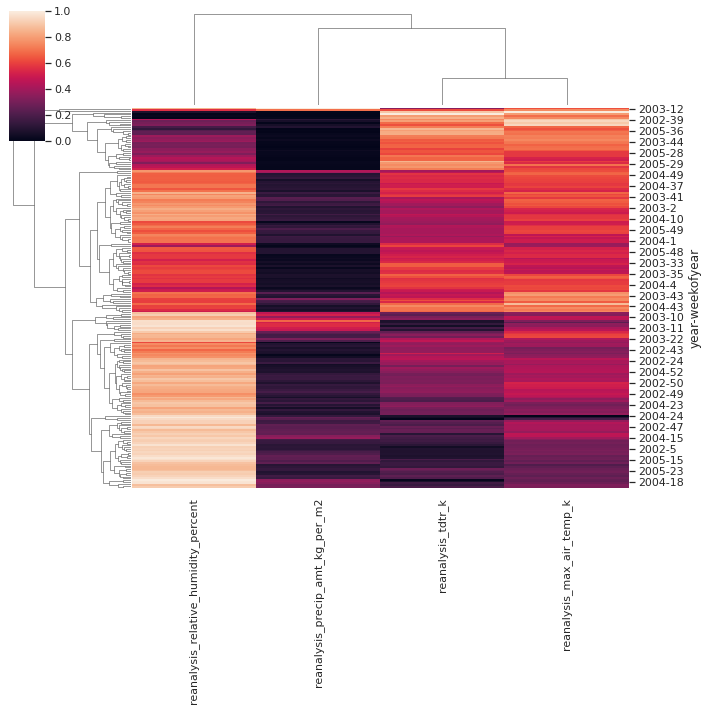

In [ ]:
sns.set(color_codes=True)
sns.clustermap(iq_sf.drop(["group","group_h"],axis = 1), standard_scale=1)